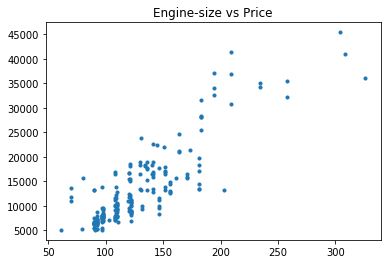

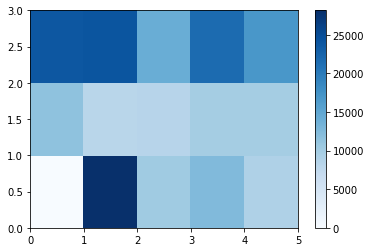

F_onewayResult(statistic=59.147713684561346, pvalue=5.7931894972840214e-05)
F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)


TypeError: 'function' object is not subscriptable

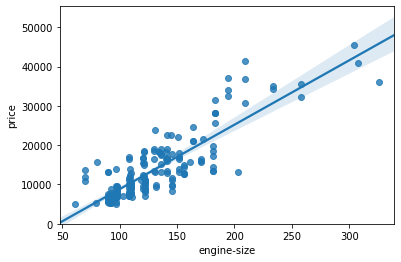

In [164]:
"""
    In this module we are going to learn
    Exploitery Data Analysis
    
        1) Descriptive Statistics
        2) Group By
        3) ANOVA
        4) Pearson Correlation
    
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns

inFile = 'files/test_cars.csv'
df = pd.read_csv(inFile)

# cleaning up data

df["normalized-losses"].fillna(df["normalized-losses"].mean(),inplace=True)
df["bore"].fillna(df["bore"].mean(), inplace=True)
df["stroke"].fillna(df["stroke"].mean(), inplace=True)
df["price"].fillna(df["price"].mean(), inplace=True)


df["city-mpg"] = 235/df["city-mpg"]
df["highway-mpg"] = 235/df["highway-mpg"]

df.rename(columns={"city-mpg":"city-m/100L"}, inplace=True)
df.rename(columns={"highway-mpg":"highway-m/100L"}, inplace=True)

# scaling data, we are min max sacling to scale length, height and width

df["height"] = ((df["height"] - df["height"].min())/(df["height"].max() - df["height"].min()))
df["width"] = ((df["width"] - df["width"].min())/(df["width"].max() - df["width"].min()))
df["length"] = ((df["length"] - df["length"].min())/(df["length"].max() - df["length"].min()))


# Data binning / grouping / categorizing

binwidth = (df["price"].max() - df["price"].min())//4
bins = range(df["price"].min().astype(int), df["price"].max().astype(int), binwidth.astype(int))
group_name = ['low','medium','high']
df['price-binned'] = pd.qcut(df["price"], 3, labels=group_name)

# One hot encoding / converting string values into numeric values

data = pd.get_dummies(df['fuel-type'])
df['gas_cars'] = data['gas']
df['diesel_cars'] = data['diesel']

"""
    Plotting charts
    
"""

x = df["engine-size"]
y = df["price"]
area = np.pi*3

plt.scatter(x,y,s=area)
plt.title('Engine-size vs Price')
plt.show()


"""
    
    Grouping data and summerizing data
    Ploting heatmap based on the result
    

"""


newDF = df[['drive-wheels','body-style', 'price']]
df_grp = newDF.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_pivot =df_grp.pivot_table(index='drive-wheels',columns='body-style',fill_value=0)

plt.pcolor(df_pivot,cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

"""

    Here we are going to see the variance between
    items.(ANOVA)

"""

df_anova = df[['make','price']]
group_anova = df_anova.groupby(["make"])
anova_f_test_result = scipy.stats.f_oneway(group_anova.get_group("jaguar")["price"],group_anova.get_group("audi")["price"])
print(anova_f_test_result)
anova_f_test_result = scipy.stats.f_oneway(group_anova.get_group("jaguar")["price"],group_anova.get_group("honda")["price"])
print(anova_f_test_result)

"""
        Correlation between engine-size and price
        
"""

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

"""
    Pearson Correlation
    
"""
df_clean = df[['horsepower', 'price']].dropna()
pearson_coef, p_value = scipy.stats.pearsonr[df_clean['horsepower'],df_clean['price']]